# Exercise 3

## Task 1

### 1.1

Main Steps:

1. Accept data and optional bin edges as input.
2. Determine bin edges if not provided.
3. Initialize a dictionary to store bin counts.
4. Iterate through data points and count them into appropriate bins.
5. Return the dictionary of bin counts.

Sub-Problems:
* **Determine Bin Edges (if not provided):**
Input: Data points, number of bins (optional).
Output: List of bin edges.

* **Count Data Points into Bins:**
Input: Data points, bin edges.
Output: Dictionary of bin counts.


In [4]:
# 1.2 Implementasjon

def determine_bin_edges(data, num_bins=None):
    """
    Determine bin edges if not provided by the user.
    """
    
    if num_bins is None:
        num_bins = int(len(data) ** 0.5)

    min_val = min(data)
    max_val = max(data)
    bin_width = (max_val - min_val) / num_bins

    bin_edges = [min_val + i * bin_width for i in range(num_bins)]
    bin_edges.append(max_val)

    return bin_edges


def histogram(data, bin_edges=None):
    """
    Compute histogram of given data points.
    """
    
    if bin_edges is None:
        bin_edges = determine_bin_edges(data)

    bin_counts = {i: 0 for i in range(len(bin_edges) - 1)}

    for point in data:
        for i in range(len(bin_edges) - 1):
            if bin_edges[i] <= point < bin_edges[i + 1]:
                bin_counts[i] += 1
                break

    return bin_counts

In [7]:
# 1.3
import numpy as np

data = np.random.normal(loc=0, scale=1, size=25)

custom_hist = histogram(data)

np_hist, bin_edges_np = np.histogram(data)

print("Custom Histogram:")
print(custom_hist)
print("\nNumPy Histogram:")
print(dict(zip(range(len(bin_edges_np) - 1), np_hist)))

print("\nAre the outputs equivalent?", custom_hist == dict(zip(range(len(bin_edges_np) - 1), np_hist)))



Custom Histogram:
{0: 4, 1: 3, 2: 12, 3: 2, 4: 3}

NumPy Histogram:
{0: 2, 1: 2, 2: 1, 3: 2, 4: 7, 5: 5, 6: 0, 7: 2, 8: 2, 9: 2}

Are the outputs equivalent? False


In [9]:
# 1.4 Playing with histograms and number of bin

import matplotlib.pyplot as plt
import os

def generate_histograms():
    n_samples = [25, 100, 1000]
    n_bins = [10, 50, 100]
    folder_name = "histograms"
    
    # Create folder if it doesn't exist
    if not os.path.exists(folder_name):
        os.makedirs(folder_name)

    for samples in n_samples:
        for bins in n_bins:
            data = np.random.normal(loc=0, scale=1, size=samples)

            plt.hist(data, bins=bins, color='blue', alpha=0.7)
            plt.title(f'Histogram for {samples} Samples and {bins} Bins')
            plt.xlabel('Value')
            plt.ylabel('Frequency')

            filename = f'hist_{samples}_{bins}.jpg'

            plt.savefig(os.path.join('plots/', filename))

            plt.close()

generate_histograms()


## Task 2

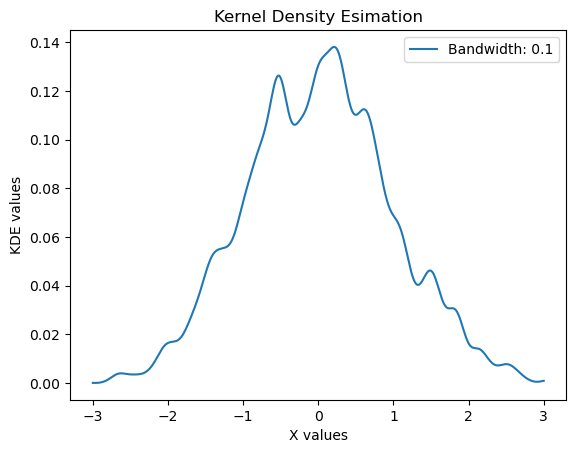

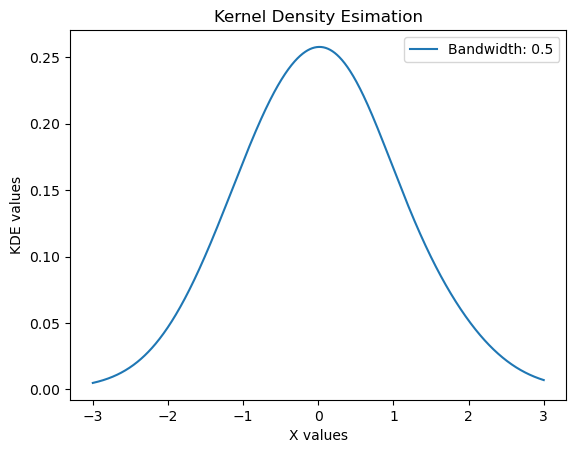

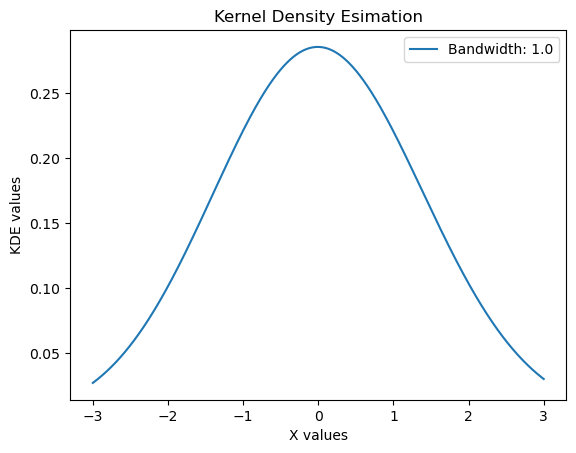

In [8]:
# 2.1 function which return the KDE value
import os
import numpy as np
import matplotlib.pyplot as plt

def bell_curve_kernel(x, xi, h):
    return ((1 / (h * (2 * np.pi)))**0.5)*np.exp(-0.5 * ((x - xi) / h)**2)

def kernel_density_estimation(x_values, data, bandwidth):
    kde_values = []
    for x in x_values:
        kde = ([bell_curve_kernel(x, xi, bandwidth) for xi in data])
        kde_value = sum(kde)/len(kde)
        kde_values.append(kde_value)
    return np.array(kde_values)

def create_folder():
    folder_name = "KDE_result"
    if not os.path.exists(folder_name):
        os.makedirs(folder_name)
    return folder_name

def save_plot(x_values, y_values, bandwidth, folder_name):
    plt.plot(x_values,y_values,label=f"Bandwidth: {bandwidth}")
    plt.title("Kernel Density Esimation")
    plt.xlabel("X values")
    plt.ylabel("KDE values")
    plt.legend()
    plt.savefig(os.path.join(folder_name,f"kde_bandwidth_{bandwidth}.png"))
    plt.show()
    
def main():
    np.random.seed(42)
    data = np.random.normal(loc=0, scale=1, size=1000)
    bandwidths = [0.1, 0.5, 1.0]
    folder_name = create_folder()
    x_values = np.linspace(-3,3,1000)
    
    for bandwidth in bandwidths:
        kde_values = kernel_density_estimation(x_values, data, bandwidth)
        
        save_plot(x_values, kde_values, bandwidth, folder_name)
        
        
if __name__ == "__main__":
    main()